In [ ]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt
from pivottablejs import pivot_ui
from IPython.display import HTML
#import qgrid
#import ipywidgets as widgets

In [ ]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

def myfunc(x):
    return slope * x + intercept

In [ ]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

In [ ]:
prices = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [ ]:
screener = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="Screener")

In [ ]:
stock_sectors = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="stock_sectors")
stock_sectors.set_index(stock_sectors.columns[0],inplace=True)
stock_sectors.columns = ['Symbol']

In [ ]:
stock_indexes = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="SP1500")
stock_indexes.drop(stock_indexes.columns[0], axis=1, inplace=True)
stock_indexes.set_index(stock_indexes.columns[0],inplace=True)
stock_indexes

In [ ]:
spdr_indexes = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="spdr_indexes")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
spdr_indexes.set_index(spdr_indexes.columns[0],inplace=True)
spdr_indexes.columns=['Symbol']
spdr_indexes

In [ ]:
vanguard_sectors = pd.read_excel('SP1500_screener_multiple - Copy.xlsx',sheet_name="vanguard_sectors")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
vanguard_sectors.set_index(vanguard_sectors.columns[0],inplace=True)
vanguard_sectors.columns=['Symbol']
vanguard_sectors

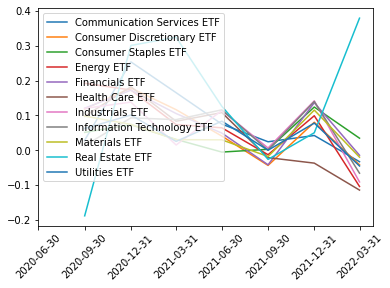

In [10]:
sector_dataset = pd.DataFrame()

for v in vanguard_sectors['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')[['Adj Close']].asfreq('Q').pct_change()
    
    plt.plot(subset)
    subset['Symbol'] = v
    sector_dataset = pd.concat([sector_dataset,subset],axis=0)
    #plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)))], rotation=45)
    plt.xticks(subset.index, rotation=45)
plt.legend(vanguard_sectors['Symbol'].index,loc=2)    
plt.show()

d_ = []
for d in sector_dataset.reset_index()['Date']:
    d_.append(d.strftime('%Y-%m-%d'))


In [11]:

sector_dataset['Date'] = d_

sector_dataset = sector_dataset.reset_index(drop=True).set_index('Date')
sector_dataset_pivot = sector_dataset.reset_index().pivot_table(values=['Adj Close'], index=['Symbol'],columns=['Date'])

sector_dataset_pivot.columns = sector_dataset_pivot.columns.droplevel(0)
sector_dataset_pivot

Date,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Symbol,,,,,,,
VAW,0.098022,0.074374,0.030385,0.029888,-0.018026,0.115277,-0.019862
VCR,0.118587,0.178685,0.116450,0.040613,-0.043573,0.080207,-0.041831
VDC,0.051209,0.073335,0.031042,-0.005272,0.002739,0.124048,0.034591
VDE,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975
VFH,0.120651,0.172363,0.105419,0.049264,-0.041816,0.136524,-0.014374
VGT,0.013268,0.092916,0.087920,0.115985,-0.000098,0.139811,-0.065856
VHT,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414
VIS,0.120087,0.138205,0.015110,0.114030,0.006319,0.141743,-0.090992
VNQ,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204


In [12]:
#qgrid.show_grid(sector_dataset_pivot)

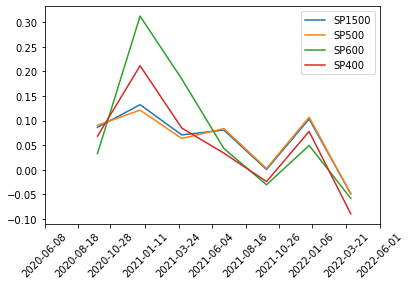

In [13]:
for v in spdr_indexes['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')
    plt.plot(subset[['Adj Close']].asfreq('Q').pct_change())
    plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)/10))], rotation=45)
plt.legend(spdr_indexes['Symbol'].index)    
plt.show()

In [14]:
screener['Symbol']

0       CERN
1       MTOR
2          Y
3       TVTY
4       LNTH
        ... 
1515    EMBC
1516     GXO
1517    LYLT
1518     EHC
1519    JW-A
Name: Symbol, Length: 1520, dtype: object

In [15]:
threshold = .9875

In [17]:
screener_good = screener[screener['risk_trend_factor']!='missing']

risk_trend_threshold = screener_good['risk_trend_factor'].quantile(q=[threshold]).values[0]


In [18]:
risk_trend_threshold

3.777257127148699

In [20]:
risk_screened = screener_good[screener_good['risk_trend_factor']>risk_trend_threshold]
risk_screened

,Symbol,max_2y,min_2y,std_2y,mean_2y,max_1y,min_1y,std_1y,mean_1y,latest_p,...,supply_trend_90d,supply_trend_60d,supply_trend_30d,vol_30d_2yr,pct_1yr,pct_2yr,MIN_Lookback_One_Year,MIN_Lookback_6_Months,MIN_Lookback_2_Months,MIN_Lookback_1_Months
0,CERN,95.400002,65.139999,8.81618,77.970305,95.400002,69.080002,9.141747,83.423869,94.970001,...,1.830002,1.669998,1.020004,56018113.250518,0.983663,0.98579,84.199997,84.199997,93.870003,94.459999
1,MTOR,36.299999,18.16,4.56425,26.82708,36.299999,20.5,5.33893,27.66068,36.16,...,0.689999,0.579998,0.18,15208337.888199,0.991139,0.992282,32.93,32.93,36.240002,36.279999
2,Y,862.869995,460.579987,88.811497,647.33944,862.869995,585.099976,73.708033,702.433441,834.159973,...,216.789978,1.789978,1.789978,1606450.10352,0.896641,0.928634,737.890015,737.890015,862.869995,862.869995
3,TVTY,32.889999,9.44,5.679438,22.70958,32.889999,21.25,3.206093,26.68348,32.34,...,2.950001,0.710001,0.710001,10468653.00207,0.952749,0.976546,27.85,29.18,32.889999,32.889999
4,LNTH,72.900002,10.52,14.515824,25.81898,72.900002,22.200001,14.933384,35.42788,71.889999,...,20.169998,13.134998,12.759998,13886530.641822,0.980079,0.983809,25.790001,31.6,59.130001,69.738998
5,MCK,339.940002,139.759995,51.795472,206.105883,339.940002,184.429993,48.012971,243.157721,316.380005,...,37.27002,4.640015,-2.97998,22548037.267081,0.848499,0.882306,204.660004,229.130005,311.73999,335.600006
6,WRB,71.580002,36.299999,8.691563,49.737962,71.580002,47.133331,7.411838,55.833304,70.610001,...,10.73,3.590004,3.559998,24434040.786749,0.960322,0.972506,54.953335,56.619999,67.580002,71.529999
7,SJI,35.32,18.24,4.441782,24.524013,35.32,20.75,4.675404,27.066214,34.689999,...,1.099998,1.099998,1.099998,27449119.254658,0.95676,0.963115,29.24,29.24,35.32,35.32
8,EXC,50.709999,24.229671,7.023846,33.287954,50.709999,31.25535,5.637367,38.822867,48.73,...,5.200001,1.959999,1.959999,164198994.674948,0.898225,0.925228,33.131241,39.129814,48.18,50.709999
9,CVX,180.960007,65.160004,28.86777,104.277264,180.960007,92.860001,27.473905,123.965167,177.600006,...,19.680008,19.680008,13.410004,239002566.873706,0.961862,0.970984,113.110001,118.080002,174.759995,174.759995


In [21]:
screener.columns

Index(['Symbol', 'max_2y', 'min_2y', 'std_2y', 'mean_2y', 'max_1y', 'min_1y',
       'std_1y', 'mean_1y', 'latest_p', '2yr_close_0pct', '2yr_close_2pct',
       '2yr_close_9pct', '2yr_close_25pct', '2yr_close_50pct',
       '2yr_close_75pct', '2yr_close_91pct', '2yr_close_98pct',
       '2yr_close_100pct', '1yr_close_0pct', '1yr_close_2pct',
       '1yr_close_9pct', '1yr_close_25pct', '1yr_close_50pct',
       '2yr_close_75pct.1', '1yr_close_91pct', '1yr_close_98pct',
       '1yr_close_100pct', 'risk_trend_factor', 'supply_trend_1yr',
       'supply_trend_180d', 'supply_trend_90d', 'supply_trend_60d',
       'supply_trend_30d', 'vol_30d_2yr', 'pct_1yr', 'pct_2yr',
       'MIN_Lookback_One_Year', 'MIN_Lookback_6_Months',
       'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months'],
      dtype='object')

In [22]:
"""
above_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values
above_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)
"""

"\nabove_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values\nabove_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values\nabove_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)\n"

In [23]:
#above_yearSDev

In [24]:
"""
above_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values
above_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)
"""

"\nabove_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values\nabove_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values\nabove_years_t = np.intersect1d(above_2year_t,above_1year_t)\n"

In [25]:
#above_years_t

In [26]:
#above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [27]:
#above_combined

In [28]:
#screened_final_set = np.intersect1d(risk_screened,above_combined)

In [29]:
screened_final_set = risk_screened.set_index('Symbol')
#screened_final_set

In [30]:
#pivot_ui(prices, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

CERN
supply trend: 56018113.2505176
Sector: Healthcare
Index: SP500


C:\Users\User\AppData\Local\Temp\ipykernel_20784\1301938157.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


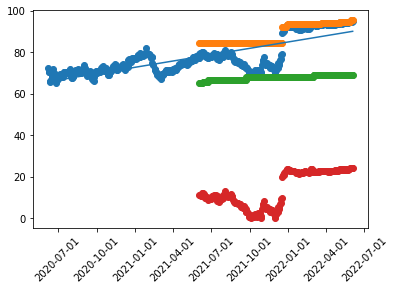

MTOR
supply trend: 15208337.88819876
Sector: error
Index: SP600


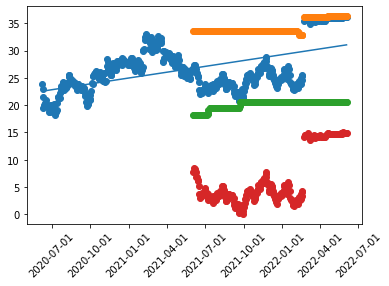

Y
supply trend: 1606450.103519669
Sector: Financial Services
Index: SP400


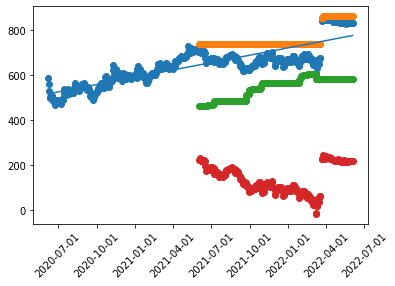

TVTY
supply trend: 10468653.00207039
Sector: error
Index: SP600


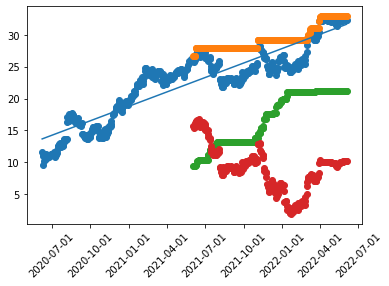

LNTH
supply trend: 13886530.64182195
Sector: Healthcare
Index: SP600


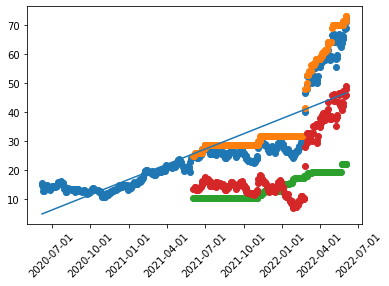

MCK
supply trend: 22548037.26708075
Sector: Healthcare
Index: SP500


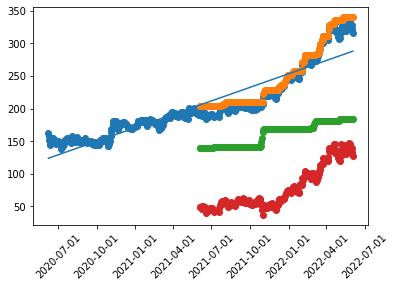

WRB
supply trend: 24434040.78674948
Sector: Financial Services
Index: SP500


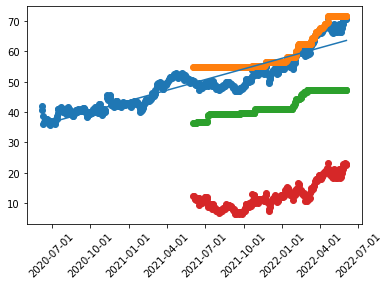

SJI
supply trend: 27449119.25465839
Sector: error
Index: SP600


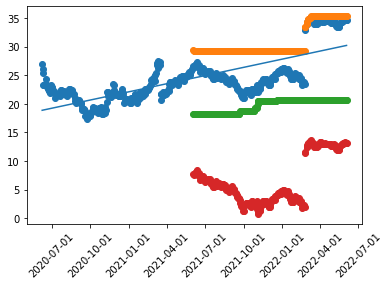

EXC
supply trend: 164198994.6749482
Sector: Utilities
Index: SP500


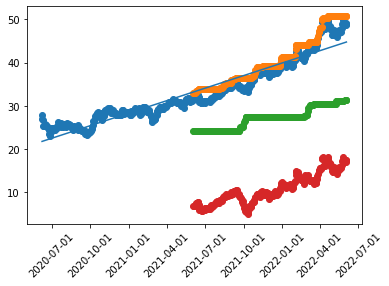

CVX
supply trend: 239002566.873706
Sector: Energy
Index: SP500


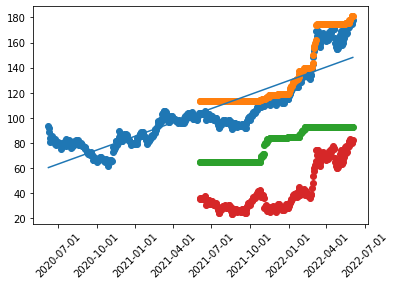

MPC
supply trend: 139430860.2484472
Sector: Energy
Index: SP500


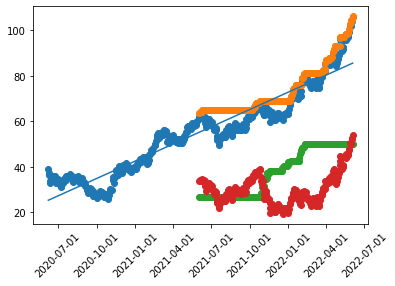

VNQ
supply trend: 25881218.01242236


IndexError: index 0 is out of bounds for axis 0 with size 0

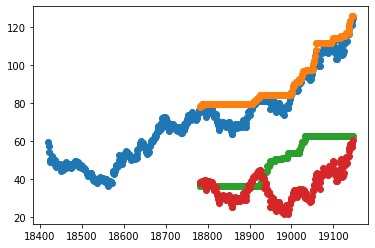

In [31]:
for s in screened_final_set.index:
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])
    
    #plt.scatter(x, subset['supply_trend'])
    plt.scatter(x, subset['supply_trend_1yr'])
    print("supply trend:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])
    print("Sector:", stock_sectors.iloc[np.where(np.array(stock_sectors.index)==s)[0][0]][0])
    print("Index:", stock_indexes.iloc[np.where(np.array(stock_indexes.index)==s)[0][0]][0])
    
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['Sector'])
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()